### Load according data

In [7]:
import pandas as pd
import oemof.solph as solph


#restore and load energy system
energy_system = solph.EnergySystem()
energy_system.restore('C:\\Users\\ann82611\\ownCloud\\U-Platte\\04_Code\\hydrogen_hub\\h2_hub_minimalschnitt\\h2_hub_dumps', 'h2_hub_dump.oemof')

results_main = energy_system.results['main']
results_meta = energy_system.results['meta'] #for costs

# Convert the results to a DataFrame
results = pd.Series(results_main)
results_meta_pd = pd.Series(results_meta)
print(results.info())
#print(results.describe())


<class 'pandas.core.series.Series'>
MultiIndex: 15 entries, ("<oemof.solph.buses._bus.Bus: 'co2_emissions_bus'>", "<oemof.solph.components._sink.Sink: 'co2_emissions'>") to ("<oemof.solph.components._source.Source: 'wind'>", "<oemof.solph.buses._bus.Bus: 'electricity'>")
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
15 non-null     object
dtypes: object(1)
memory usage: 934.0+ bytes
None


## System Performance
The system performance is defined per below consisting of:
* Electricity deliverd to steel mill
* Hydrogen deliverd to steel mill
* Co2 Emissions
* Costs #aufsummierte kosten

Please keep in mind that the definition of the system performance may vary over time and also to the considered system accordingly.

In [32]:
#Schlüssel sind objekte (keine Strings!) 

# get df flows 
flow_el_steel = results.loc[(energy_system.node['electricity'], energy_system.node['steel_mill'])]['sequences']
flow_h2_steel = results.loc[(energy_system.node['h2_bus'],  energy_system.node['steel_mill'])]['sequences']
flow_co2 = results.loc[(energy_system.node['co2_emissions_bus'],  energy_system.node['co2_emissions'])]['sequences']
operating_costs = results_meta_pd['objective']
print(operating_costs)

#extract values from df flows
flow_el_steel_values = flow_el_steel['flow']
flow_h2_steel_values = flow_h2_steel['flow']
flow_co2_values = flow_co2['flow']
operating_costs_values = [operating_costs] * (len(flow_co2_values))
# Füge die Betriebskosten hinzu, falls sie ein skalarer Wert sind
# system_performance['operating_costs'] = [operating_costs] * len(system_performance)

# Turn into combined DataFrame
system_performance = pd.DataFrame({'flow_co2': flow_co2_values, 'flow_el_steel': flow_el_steel_values, 'flow_h2_steel': flow_h2_steel_values, 'operating_costs': operating_costs_values})
print(system_performance.info())
print(system_performance.describe())


-641.6687338070664
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8761 entries, 2019-01-01 00:00:00 to 2020-01-01 00:00:00
Freq: H
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flow_co2         8760 non-null   float64
 1   flow_el_steel    8760 non-null   float64
 2   flow_h2_steel    8760 non-null   float64
 3   operating_costs  8761 non-null   float64
dtypes: float64(4)
memory usage: 342.2 KB
None
       flow_co2  flow_el_steel  flow_h2_steel  operating_costs
count    8760.0    8760.000000    8760.000000     8.761000e+03
mean        0.0      22.396290     602.053600    -6.416687e+02
std         0.0      13.367253     359.336420     1.136933e-13
min        -0.0       0.000000       0.000000    -6.416687e+02
25%        -0.0      11.753121     315.945592    -6.416687e+02
50%        -0.0      23.827143     640.517585    -6.416687e+02
75%         0.0      30.585738     822.201087    -6.416687e+02
max 

c:\Users\ann82611\AppData\Local\Programs\Python\Python312\Lib\site-packages\oemof\network\energy_system.py:205: ExperimentalFeatureWarning: The API to access nodes by label is experimental and might change without prior notice.
  warnings.warn(msg, debugging.ExperimentalFeatureWarning)


### Plot System Performance

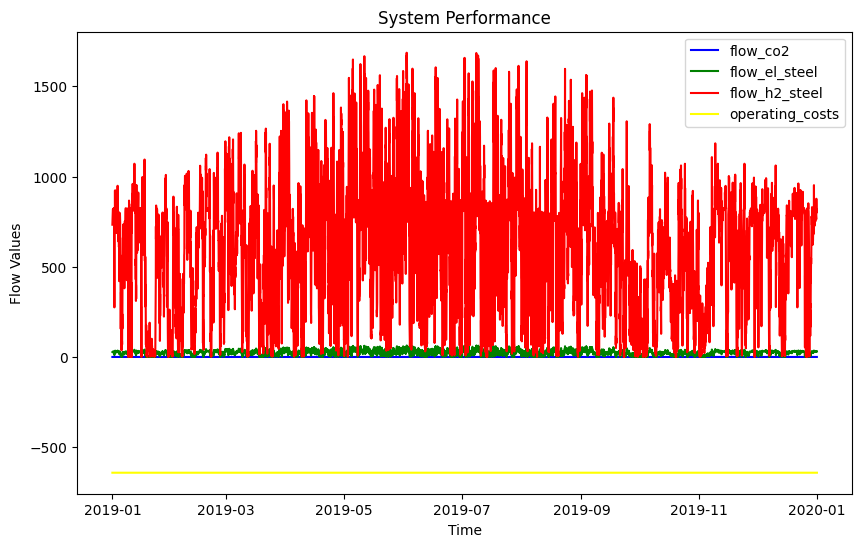

In [33]:
import matplotlib.pyplot as plt

# Erstelle eine Figur und eine Achse
plt.figure(figsize=(10, 6))

# Plotte die drei Zeitreihen
plt.plot(system_performance.index, system_performance['flow_co2'], label='flow_co2', color='blue')
plt.plot(system_performance.index, system_performance['flow_el_steel'], label='flow_el_steel', color='green')
plt.plot(system_performance.index, system_performance['flow_h2_steel'], label='flow_h2_steel', color='red')
plt.plot(system_performance.index, system_performance['operating_costs'], label='operating_costs', color='yellow')

# Füge Titel und Beschriftungen hinzu
plt.title('System Performance')
plt.xlabel('Time')
plt.ylabel('Flow Values')

# Füge eine Legende hinzu
plt.legend()

# Zeige die Abbildung an
plt.show()

       flow_co2  flow_el_steel  flow_h2_steel
count    8760.0    8760.000000    8760.000000
mean        0.0       0.356989       0.356989
std         0.0       0.213069       0.213069
min         0.0       0.000000       0.000000
25%         0.0       0.187341       0.187341
50%         0.0       0.379796       0.379796
75%         0.0       0.487526       0.487526
max         0.0       1.000000       1.000000


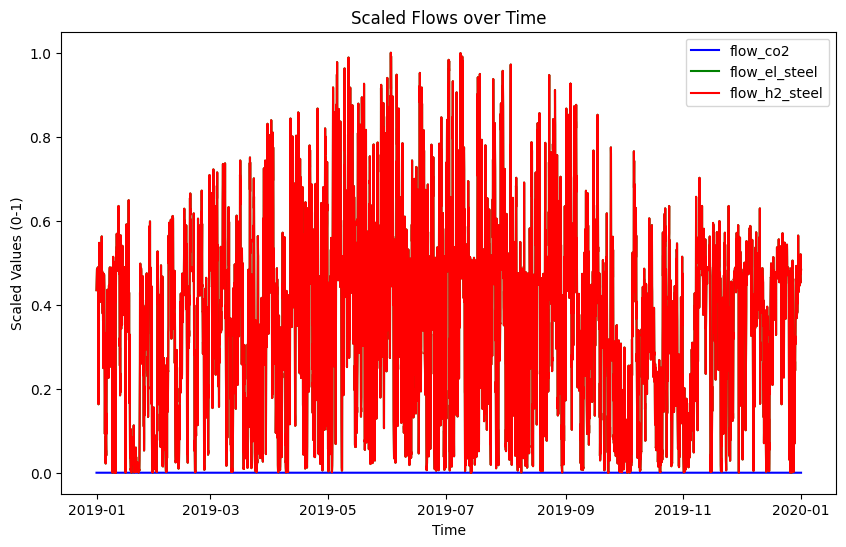

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Erstelle einen Skaler
scaler = MinMaxScaler()

# Normiere die Werte zwischen 0 und 1
scaled_values = scaler.fit_transform(system_performance)

# Erstelle ein neues DataFrame mit den normierten Werten
scaled_df = pd.DataFrame(scaled_values, columns=system_performance.columns, index=system_performance.index)

print(scaled_df.describe())

# Plotten der normierten Werte
plt.figure(figsize=(10, 6))
plt.plot(scaled_df.index, scaled_df['flow_co2'], label='flow_co2', color='blue')
plt.plot(scaled_df.index, scaled_df['flow_el_steel'], label='flow_el_steel', color='green')
plt.plot(scaled_df.index, scaled_df['flow_h2_steel'], label='flow_h2_steel', color='red')

# Titel und Beschriftungen
plt.title('Scaled Flows over Time')
plt.xlabel('Time')
plt.ylabel('Scaled Values (0-1)')
plt.legend()

plt.show()
